In [118]:
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


import warnings
warnings.filterwarnings("ignore")

In [119]:
training = pd.read_csv("/home/samruddhak/Downloads/train.csv")
testing = pd.read_csv("/home/samruddhak/Downloads/test.csv")

In [120]:
training.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
print(training.shape)
training

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# removing lable column form data for x
X_train = training.drop("label", axis=1)

# getting only lable column form data
y_train = training["label"]

X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


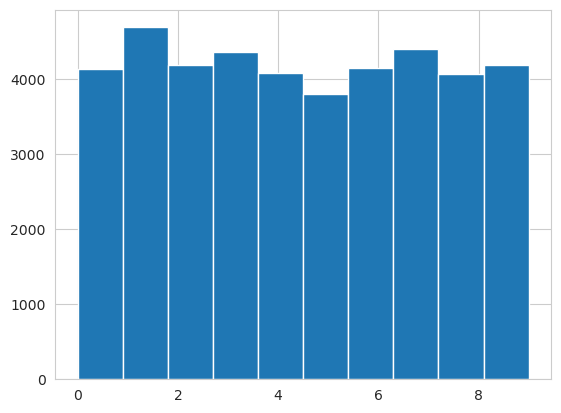

In [123]:
# histogram compare of all data for each lable digit (should be near about same to each other)
ax = plt.hist(training["label"])


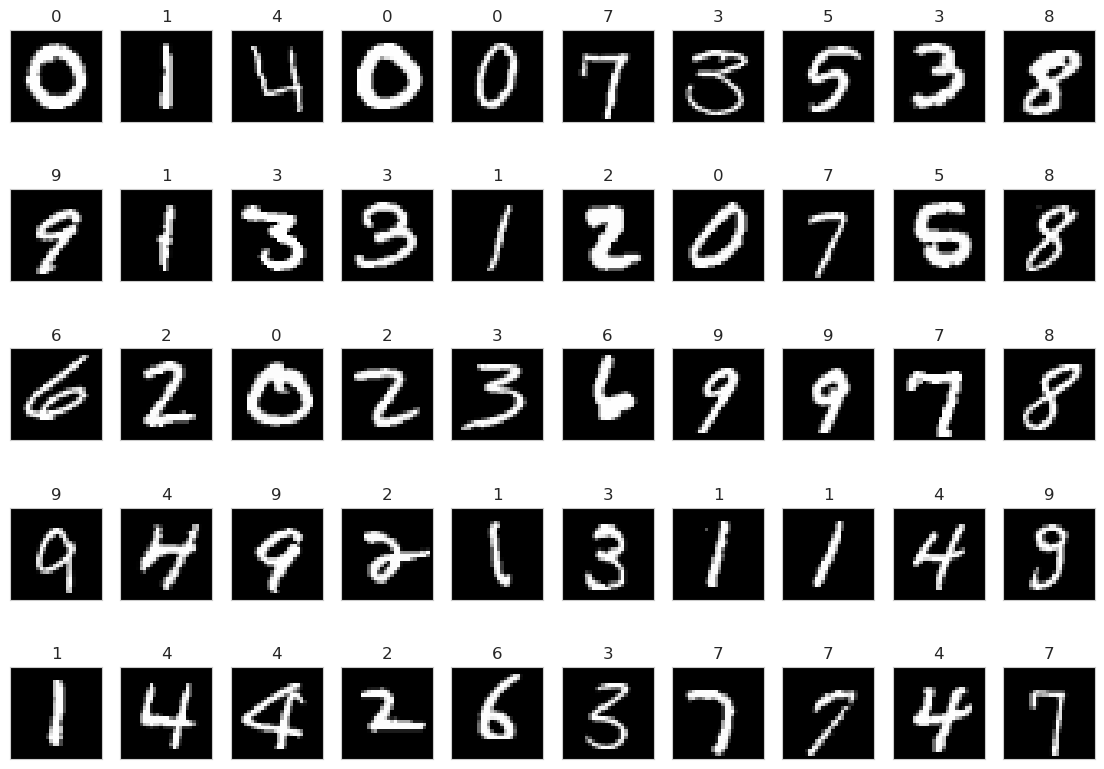

In [124]:
# images of x data and its lable
plt.figure(figsize=(14, 10))
def show_images(numbers):
    for i in range(1, numbers + 1):
        plt.subplot(5, 10, i)
        image = X_train.iloc[i].to_numpy()
        image = image.reshape((28,28))
        plt.imshow(image, cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.title(y_train[i])

show_images(50)

In [125]:
# converting pixels into float values to range from 1 to 0 ( for optimization fast computing and correct values predictions)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def rescale_table(table):
    table = table.astype("float32")
    for i in table:
        reshaped_array = np.array(table[i]).reshape(-1, 1)
        table[i] = scaler.fit_transform(reshaped_array)
    return table

X_train = rescale_table(X_train)

X_test = testing
X_test = rescale_table(X_test)

#delete old sets to free space
del training
del testing

In [126]:
max(X_train["pixel99"])

1.0

In [127]:
X_train.shape

(42000, 784)

In [128]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [129]:
def one_hot_encode(series):
    return pd.get_dummies(series).to_numpy()

y_train = one_hot_encode(y_train)

In [130]:
y_train

array([[False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

In [131]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [158]:
import tensorflow as tf

In [173]:
# this is we are using from tensor 1 as 2 doesnt have placeholder methods
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


learning_rate = 0.3
epochs = 100

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
bias = tf.Variable(tf.zeros([10]))

y_true = tf.placeholder(tf.float32, [None, 10])
y_prediction = tf.nn.softmax(tf.matmul(x, W) + bias)

In [174]:
cross_entropy = tf.reduce_mean(loss_function(y_true, y_prediction))

In [175]:
correct_predictions = tf.equal(tf.argmax(y_prediction,1), tf.argmax(y_true,1))
accuracy_measure = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [176]:
#optimizer we will use
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [164]:
sess = tf.InteractiveSession()

init = tf.global_variables_initializer()
sess.run(init)

In [165]:
#training the model with Gradient Descent
for i in range(epochs + 1):
    sess.run(training_step, feed_dict={x: X_train, y_true: y_train})
    print("Epoch " + str(i) + " accuracy: " + str(sess.run(accuracy_measure, feed_dict={x: X_valid, y_true: y_valid})))

Epoch 0 accuracy: 0.6725
Epoch 1 accuracy: 0.75488096
Epoch 2 accuracy: 0.7745238
Epoch 3 accuracy: 0.7909524
Epoch 4 accuracy: 0.8013095
Epoch 5 accuracy: 0.8088095
Epoch 6 accuracy: 0.81595236
Epoch 7 accuracy: 0.82059526
Epoch 8 accuracy: 0.82464284
Epoch 9 accuracy: 0.8289286
Epoch 10 accuracy: 0.83178574
Epoch 11 accuracy: 0.8352381
Epoch 12 accuracy: 0.8378571
Epoch 13 accuracy: 0.84119046
Epoch 14 accuracy: 0.8434524
Epoch 15 accuracy: 0.8453571
Epoch 16 accuracy: 0.8471429
Epoch 17 accuracy: 0.84880954
Epoch 18 accuracy: 0.8504762
Epoch 19 accuracy: 0.85261905
Epoch 20 accuracy: 0.8542857
Epoch 21 accuracy: 0.85559523
Epoch 22 accuracy: 0.8567857
Epoch 23 accuracy: 0.85785717
Epoch 24 accuracy: 0.85821426
Epoch 25 accuracy: 0.85940474
Epoch 26 accuracy: 0.8604762
Epoch 27 accuracy: 0.8622619
Epoch 28 accuracy: 0.8630952
Epoch 29 accuracy: 0.8642857
Epoch 30 accuracy: 0.86535716
Epoch 31 accuracy: 0.8667857
Epoch 32 accuracy: 0.8680952
Epoch 33 accuracy: 0.8680952
Epoch 34 accur

In [166]:
sess.run(accuracy_measure, feed_dict={x: X_valid, y_true: y_valid})

0.89297616

In [167]:
# run the predictions for test data
predictions = tf.argmax(y_prediction, 1)
predicted_labels = predictions.eval(feed_dict={x: X_test})
print(predictions.eval(feed_dict={x: X_test}))
sess.close()

[2 0 9 ... 3 9 2]


In [168]:
# predicted values
print(predicted_labels)
predicted_labels.shape
# X_test.shape

[2 0 9 ... 3 9 2]


(28000,)

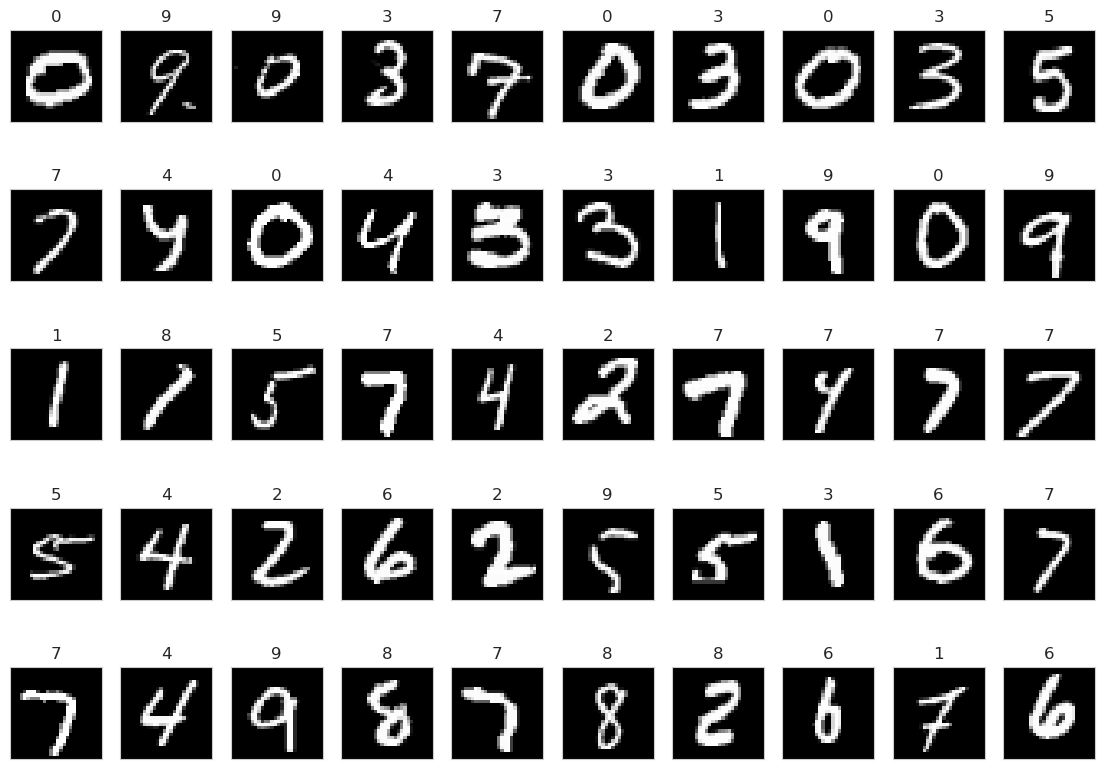

In [169]:
# to check the predictions and its data images
plt.figure(figsize=(14, 10))

def show_images(numbers):
    for i in range(1, numbers + 1):
        plt.subplot(5, 10, i)
        image = X_test.iloc[i].to_numpy()
        image = image.reshape((28,28))
        plt.imshow(image, cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.title(predicted_labels[i])

show_images(50)